# Benchmarks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.ticker import ScalarFormatter

In [ ]:
methods = ['tmvec1', 'tmvec2', 'tmvec2_student', 'foldseek']
names = ['TM-Vec', 'TM-Vec 2', 'TM-Vec 2 Student', 'Foldseek']

Encoding

In [4]:
df = pd.read_csv('bench/encoding.csv')

In [5]:
df_melt = df.melt(id_vars='sequences', var_name='method', value_name='runtime')

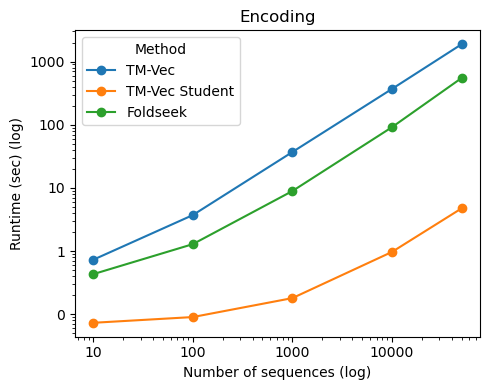

In [6]:
plt.figure(figsize=(5, 4))
for method, name in zip(methods, names):
    df_ = df_melt.query(f'method == "{method}"')
    plt.plot('sequences', 'runtime', data=df_, marker='o', label=name)
plt.legend(title='Method')
plt.xscale('log')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Number of sequences (log)')
plt.ylabel('Runtime (sec) (log)')
plt.title('Encoding')
plt.tight_layout()
plt.savefig('plots/encoding.svg')

Query

In [7]:
df = pd.read_csv('bench/query.csv')

In [8]:
df_melt = df.melt(id_vars=['query_size', 'db_size'], var_name='method', value_name='runtime')

In [9]:
db_sizes = [1000, 10000, 100000]

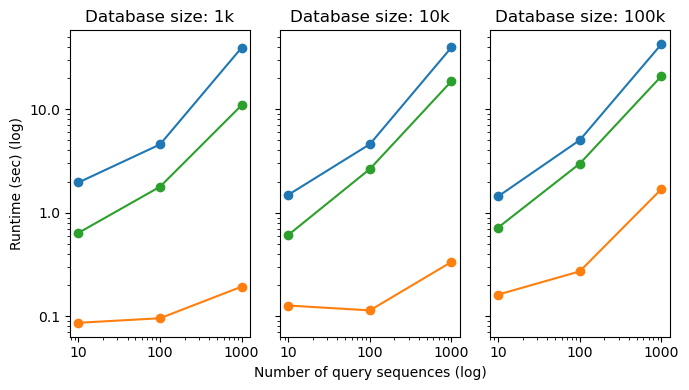

In [10]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(7, 4))
for i, size in enumerate(db_sizes):
    ax = axes[i]
    for method in methods:
        df_ = df_melt.query(f'db_size == {size} & method == "{method}"')
        ax.plot('query_size', 'runtime', data=df_, marker='o')
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(ScalarFormatter())
    if i == 0:
        ax.set_ylabel('Runtime (sec) (log)')
        ax.set_yscale('log')
        ax.yaxis.set_major_formatter(ScalarFormatter())
    if i == 1:
        ax.set_xlabel('Number of query sequences (log)')
    ax.set_title(f'Database size: {int(size / 1000)}k')
fig.tight_layout()
fig.savefig('plots/query.svg')